In [222]:
import json

import matplotlib.pyplot as plt

from wapy.api import Wapy
from pprint import pprint
from watson_developer_cloud import ToneAnalyzerV3
from tkinter import *
from tkinter import Tk, Label, Button
import tkinter as tk


In [223]:
def pie_chart(positive,negative,nuetral):
    plt.figure()
    labels = ['Positive','Negative','Nuetral']
    values = [positive,negative,nuetral]
    colors = ['green','red','grey']
    plt.pie(values, labels=labels,colors=colors,autopct='%.2f')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    return;

In [224]:
def sentiment_analysis(prod_name):
    print(prod_name)
    tone_analyzer = ToneAnalyzerV3(
    version ='2017-09-21',
    username ='ef70c79e-425a-4b9c-8284-82dd095aacd3',
    password ='bHH8YNNK2GI2'
    )
    wapy = Wapy('3ut4a3gjtg8n935snz73mgjj')
    positive = 0
    nuetral = 0
    negative = 0
    products = wapy.search(prod_name)
    for k in products:
        a = (k.item_id)
        reviews = wapy.product_reviews(str(a))
        for rev in reviews:
            c=(rev.review)
            text = str(c)
            content_type = 'application/json'
            tone = tone_analyzer.tone({"text": text},content_type)
            json.dumps(tone, indent=3)
            if(len(tone['document_tone']['tones'])>0):
                #(tone['document_tone']['tones'][0]['score'])
                if (tone['document_tone']['tones'][0]['score']) > 0.74:
                    positive = positive + 1
                elif (tone['document_tone']['tones'][0]['score']) > 0.60 and (tone['document_tone']['tones'][0]['score']) < 0.75:
                    nuetral = nuetral + 1
                else:
                    negative = negative + 1
    pie_chart(positive,negative,nuetral)
    return;
        

In [225]:
def gui():
    window  = Tk()
    entryb=StringVar()
    window.configure(background="#ff4500")
    window.title("Analysis")
    Label(window,text="Product Name:", bg="#ffff33").grid(row=0, padx = 10, sticky = W)
    en=Entry(window, textvariable=entryb).grid(row=0, column = 1)
    
    #e = Entry(window)
    #e.focus()
    #print(e)
    Button(window, text ="Search",command = lambda:sentiment_analysis(entryb.get())).grid(row=3, column = 1, pady = 10)
       
    window.mainloop()
    return;

iphone 6


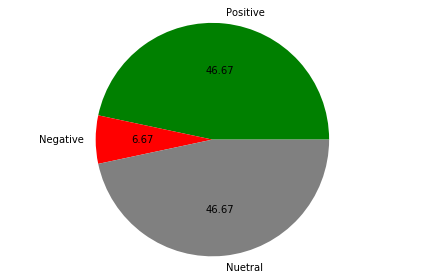

samsung s7


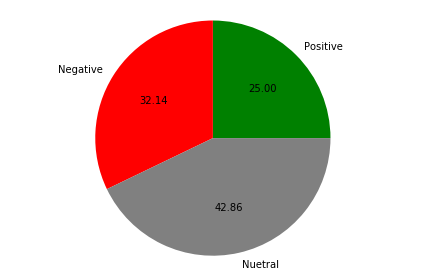

In [226]:
gui()